import library yang diperlukan

In [ ]:
import os
import cv2
import random
import pandas as pd
import matplotlib.pylab as plt

install library roboflow untuk mengambil dataset struk alfamart dan indomaret

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


ambil dataset dari roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="kUlGu5UeX4jInkawHNvh")
project = rf.workspace("alfaindostruk").project("alfamart-indomaret-struk")
version = project.version(3)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Alfamart-Indomaret-Struk-3 in yolov11:: 100%|██████████| 500/500 [00:00<00:00, 2830.99it/s]


dapatkan path untuk train dan valid dataset. serta hitung jumlah gambar untuk masing-masing dataset.

In [ ]:
dataset_dir = 'Alfamart-Indomaret-Struk-3'

train_dir = os.path.join(dataset_dir, 'train')
valid_dir = os.path.join(dataset_dir, 'valid')

train_images_dir = os.path.join(train_dir, 'images')
train_labels_dir = os.path.join(train_dir, 'labels')

valid_images_dir = os.path.join(valid_dir, 'images')
valid_labels_dir = os.path.join(valid_dir, 'labels')

In [ ]:
train_len = len(os.listdir(train_images_dir))
valid_len = len(os.listdir(valid_images_dir))

print(f'Number of training images: {train_len}')
print(f'Number of validation images: {valid_len}')

Number of training images: 213
Number of validation images: 20


definisikan label sesuai dengan dataset
- product_item
- product_item_discount
- product_item_voucher

In [ ]:
label_names = ['product_item', 'product_item_discount', 'product_item_voucher']

fungsi untuk menggambarkan bounding box object

In [ ]:
def visualize_bounding_boxes(image_path, annotation_path):
  image = cv2.imread(image_path)
  try:
    annotation = pd.read_csv(annotation_path, delimiter=' ', header=None)

    for _, row in annotation.iterrows():
      label_name = row[0]
      label_name = label_names[int(label_name)]
      print(f'Label name: {label_name}')

      x_center, y_center, width, height = row[1:].values
      x_min = int((x_center - width / 2) * image.shape[1])
      y_min = int((y_center - height / 2) * image.shape[0])
      x_max = int((x_center + width / 2) * image.shape[1])
      y_max = int((y_center + height / 2) * image.shape[0])

      cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
      cv2.putText(image, str(label_name), (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
  except:
    print(f'No annotation found for {annotation_path}')

  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.show()

tampilkan 5 gambar random dari train dataset dengan bounding box

Image file: CamScanner-18-11-2024-12-48_1_jpg.rf.495483a2cfe4e26c3085e2a5c40fa86d.jpg
Annotation file: Alfamart-Indomaret-Struk-3/train/labels/CamScanner-18-11-2024-12-48_1_jpg.rf.495483a2cfe4e26c3085e2a5c40fa86d.txt
Label name: product_item
Label name: product_item
Label name: product_item
Label name: product_item
Label name: product_item
Label name: product_item_discount
Label name: product_item_discount
Label name: product_item_voucher
Label name: product_item_voucher


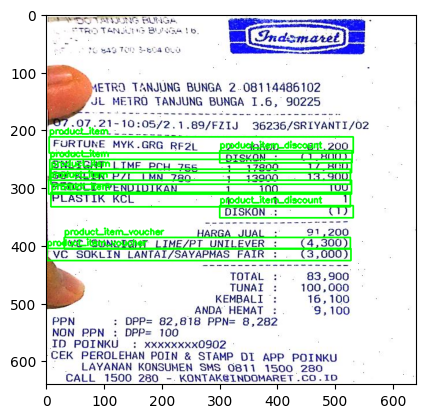


Image file: CamScanner-18-11-2024-12-48_62_jpg.rf.056a4d141dce83453255a90b6dca9cad.jpg
Annotation file: Alfamart-Indomaret-Struk-3/train/labels/CamScanner-18-11-2024-12-48_62_jpg.rf.056a4d141dce83453255a90b6dca9cad.txt
Label name: product_item
Label name: product_item
Label name: product_item
Label name: product_item


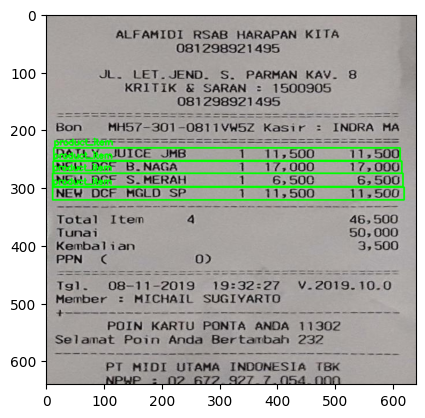


Image file: CamScanner-18-11-2024-12-48_38_jpg.rf.9b983adb5d6f31f5c20762d43898b0d6.jpg
Annotation file: Alfamart-Indomaret-Struk-3/train/labels/CamScanner-18-11-2024-12-48_38_jpg.rf.9b983adb5d6f31f5c20762d43898b0d6.txt
Label name: product_item
Label name: product_item
Label name: product_item
Label name: product_item
Label name: product_item_discount


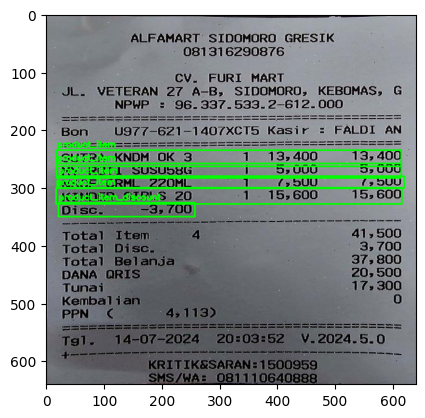


Image file: CamScanner-18-11-2024-12-48_48_jpg.rf.1c3384c144d0cf6fb66c11c9fd27cec0.jpg
Annotation file: Alfamart-Indomaret-Struk-3/train/labels/CamScanner-18-11-2024-12-48_48_jpg.rf.1c3384c144d0cf6fb66c11c9fd27cec0.txt
Label name: product_item
Label name: product_item_discount


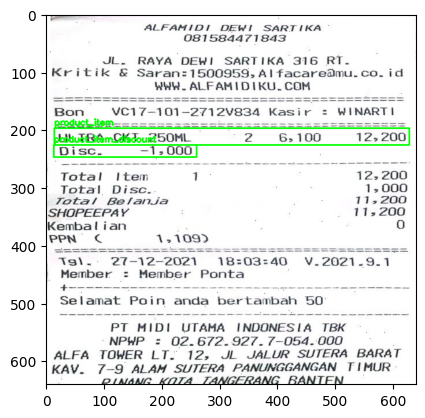


Image file: CamScanner-18-11-2024-12-48_68_jpg.rf.80c1dc52d176df2a5ba4c04b5730462d.jpg
Annotation file: Alfamart-Indomaret-Struk-3/train/labels/CamScanner-18-11-2024-12-48_68_jpg.rf.80c1dc52d176df2a5ba4c04b5730462d.txt
Label name: product_item
Label name: product_item_discount


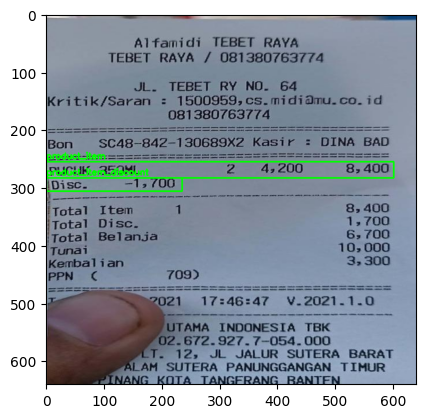

In [ ]:
train_image_files = [file for file in os.listdir(train_images_dir)]
random_train_image_files = random.sample(train_image_files, 5)

for random_train_image_file in random_train_image_files:
  image_path = os.path.join(train_images_dir, random_train_image_file)
  annotation_path = os.path.join(train_labels_dir, random_train_image_file.replace('.jpg', '.txt'))

  print(f'Image file: {random_train_image_file}')
  print(f'Annotation file: {annotation_path}')
  visualize_bounding_boxes(image_path, annotation_path)
  print()

hitung distribusi object untuk masing-masing label, kemudian visualisasikan menggunakan bar graph.

In [ ]:
train_annotation_files = [file for file in os.listdir(train_labels_dir)]

label_names_count = {label: 0 for label in label_names}
empty_train_annotation_files = []

for train_annotation_file in train_annotation_files:
  train_annotation_file = os.path.join(train_labels_dir, train_annotation_file)
  try:
    annotation = pd.read_csv(train_annotation_file, delimiter=' ', header=None)
  except:
    empty_train_annotation_files.append(train_annotation_file)
    continue

  for label in annotation[0]:
    label_names_count[label_names[label]] += 1

print(f'Empty train annotation files: {len(empty_train_annotation_files)}')
print(label_names_count)

Empty train annotation files: 6
{'product_item': 780, 'product_item_discount': 180, 'product_item_voucher': 99}


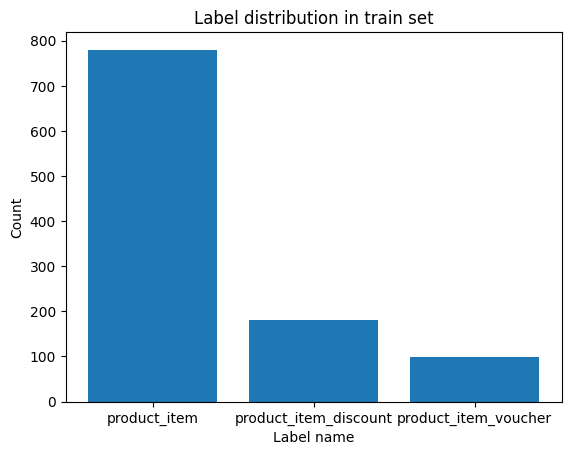

In [ ]:
plt.bar(label_names_count.keys(), label_names_count.values())
plt.xlabel('Label name')
plt.ylabel('Count')
plt.title('Label distribution in train set')
plt.show()

install library ultralytics untuk menggunakan YOLO sebagai library object detection

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.2/887.2 kB 26.0 MB/s eta 0:00:00


import library YOLO

In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!yolo checks

Ultralytics 8.3.33 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.5/112.6 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
Disk                32.5/112.6 GB
CPU                 Intel Xeon 2.00GHz
CPU count           2
GPU                 Tesla T4, 15102MiB
GPU count           1
CUDA                12.1

numpy               ✅ 1.26.4>=1.23.0
matplotlib          ✅ 3.8.0>=3.3.0
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 11.0.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.13.1>=1.4.1
torch               ✅ 2.5.1+cu121>=1.8.0
torchvision         ✅ 0.20.1+cu121>=0.9.0
tqdm                ✅ 4.66.6>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.2.2>=1.1.4
seaborn             ✅ 0.13.2>=0.11.0
ultralytic

import model YOLO, gunakan model terbaru: yolo11n

In [ ]:
model = YOLO('yolo11n.pt')

100%|██████████| 5.35M/5.35M [00:00<00:00, 77.0MB/s]


lakukan training model object detection menggunakan dataset yang sudah didefinisikan sebelumnya. gunakan epochs minimal 200 (saran dari advisor ML)

In [ ]:
results = model.train(
    data='/content/Alfamart-Indomaret-Struk-3/data.yaml',
    epochs=60,
    optimizer='NAdam',
    save=True,
    verbose=True,
    lr0=1e-3,
    plots=True,
)

Ultralytics 8.3.33 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Alfamart-Indomaret-Struk-3/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=NAdam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

100%|██████████| 755k/755k [00:00<00:00, 22.4MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Alfamart-Indomaret-Struk-3/train/labels... 213 images, 6 backgrounds, 0 corrupt: 100%|██████████| 213/213 [00:00<00:00, 1506.56it/s]

train: New cache created: /content/Alfamart-Indomaret-Struk-3/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Alfamart-Indomaret-Struk-3/valid/labels... 20 images, 1 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 719.64it/s]

val: New cache created: /content/Alfamart-Indomaret-Struk-3/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: NAdam(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      2.63G      4.388      4.505      3.183         37        640: 100%|██████████| 14/14 [00:08<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.54s/it]

                   all         20        134    0.00106     0.0621    0.00355   0.000601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      2.68G      2.402      2.923      1.631         37        640: 100%|██████████| 14/14 [00:03<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         20        134    0.00483      0.284     0.0453      0.011



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60      2.61G      2.045      2.466      1.549         55        640: 100%|██████████| 14/14 [00:05<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         20        134    0.00561       0.33     0.0272    0.00582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      2.47G      1.921      2.338      1.482         39        640: 100%|██████████| 14/14 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all         20        134     0.0557      0.239      0.103     0.0346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      2.46G       1.84      2.148      1.453         60        640: 100%|██████████| 14/14 [00:04<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         20        134       0.81      0.101      0.145     0.0339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      2.45G      1.907      2.126       1.53         39        640: 100%|██████████| 14/14 [00:06<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         20        134      0.745      0.173     0.0931     0.0259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60      2.61G      1.844      2.051      1.453         50        640: 100%|██████████| 14/14 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all         20        134      0.766       0.16      0.174     0.0667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60      2.52G      1.848      1.975      1.389         48        640: 100%|██████████| 14/14 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         20        134      0.818      0.213       0.28      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      2.54G      1.725       1.87       1.35         54        640: 100%|██████████| 14/14 [00:05<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         20        134      0.632      0.364      0.242     0.0701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      2.58G      1.605      1.702      1.313         61        640: 100%|██████████| 14/14 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]

                   all         20        134      0.251       0.46      0.308      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      2.49G      1.586      1.695      1.316         43        640: 100%|██████████| 14/14 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]

                   all         20        134      0.297      0.293      0.302      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      2.57G      1.619      1.636      1.263         48        640: 100%|██████████| 14/14 [00:06<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]

                   all         20        134      0.727      0.346      0.384      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      2.56G       1.51      1.544      1.244         32        640: 100%|██████████| 14/14 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all         20        134      0.749      0.477      0.499      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      2.53G      1.473      1.509       1.24         44        640: 100%|██████████| 14/14 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all         20        134      0.805      0.433      0.547      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      2.57G      1.447      1.468      1.217         47        640: 100%|██████████| 14/14 [00:05<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         20        134      0.587      0.611      0.534      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60      2.58G      1.446       1.39      1.222         41        640: 100%|██████████| 14/14 [00:03<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         20        134      0.605      0.645      0.604      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      2.64G      1.395      1.421      1.215         35        640: 100%|██████████| 14/14 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         20        134      0.609      0.548      0.614      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      2.45G      1.338      1.314      1.167         81        640: 100%|██████████| 14/14 [00:05<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         20        134      0.671      0.543      0.616       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      2.56G      1.364      1.326      1.179         53        640: 100%|██████████| 14/14 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.41it/s]


                   all         20        134      0.652      0.603      0.641      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      2.61G      1.408      1.265      1.176         61        640: 100%|██████████| 14/14 [00:03<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.86it/s]

                   all         20        134      0.559      0.537      0.656      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      2.52G       1.34      1.288      1.158         38        640: 100%|██████████| 14/14 [00:05<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         20        134      0.715      0.556      0.649        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      2.52G      1.312      1.245      1.154         42        640: 100%|██████████| 14/14 [00:03<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         20        134      0.665        0.6      0.623      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      2.53G        1.3      1.184      1.146         20        640: 100%|██████████| 14/14 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all         20        134      0.683      0.626      0.651      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60      2.57G      1.292      1.143      1.118         59        640: 100%|██████████| 14/14 [00:05<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         20        134      0.779      0.668      0.743      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      2.55G      1.311       1.16      1.114         92        640: 100%|██████████| 14/14 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all         20        134      0.707       0.66      0.726      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      2.54G      1.324      1.137      1.141         20        640: 100%|██████████| 14/14 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]

                   all         20        134      0.748      0.744      0.755       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      2.57G      1.244      1.085      1.095         46        640: 100%|██████████| 14/14 [00:05<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         20        134       0.75      0.722      0.752      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      2.47G      1.218      1.041      1.092         46        640: 100%|██████████| 14/14 [00:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         20        134      0.691      0.815      0.788      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      2.51G      1.259      1.081       1.13         40        640: 100%|██████████| 14/14 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         20        134      0.749       0.78      0.793      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      2.56G      1.194      1.009      1.082         50        640: 100%|██████████| 14/14 [00:06<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         20        134      0.778       0.77      0.821      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      2.46G      1.173     0.9838      1.069         37        640: 100%|██████████| 14/14 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.08it/s]

                   all         20        134      0.698      0.767      0.791      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      2.63G      1.188     0.9868      1.071         52        640: 100%|██████████| 14/14 [00:03<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]

                   all         20        134      0.646      0.737      0.767      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      2.56G      1.152      1.012      1.071         72        640: 100%|██████████| 14/14 [00:05<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         20        134      0.778      0.757      0.811      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60      2.49G      1.144     0.9985      1.052         49        640: 100%|██████████| 14/14 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all         20        134      0.871      0.639      0.815       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      2.55G      1.177     0.9573      1.033         48        640: 100%|██████████| 14/14 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all         20        134      0.706      0.825      0.821      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      2.53G       1.13      1.005      1.069         14        640: 100%|██████████| 14/14 [00:05<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         20        134      0.806      0.741      0.835      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60      2.65G      1.179     0.9834      1.079         36        640: 100%|██████████| 14/14 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         20        134      0.774      0.834       0.85      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      2.49G      1.145     0.9183      1.034         28        640: 100%|██████████| 14/14 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all         20        134      0.765      0.852      0.856      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60       2.6G      1.131     0.9043       1.03         40        640: 100%|██████████| 14/14 [00:05<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         20        134       0.81      0.822      0.866      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      2.59G      1.086     0.9133      1.031         38        640: 100%|██████████| 14/14 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         20        134      0.899      0.774      0.881      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60      2.46G      1.084     0.8854       1.02         44        640: 100%|██████████| 14/14 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         20        134      0.807       0.81      0.858      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60      2.57G      1.047     0.8663       1.01         55        640: 100%|██████████| 14/14 [00:05<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         20        134      0.785      0.825       0.85      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60      2.58G      1.067     0.8844      1.018         37        640: 100%|██████████| 14/14 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         20        134      0.847      0.812      0.878      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      2.47G       1.12     0.9048      1.012         66        640: 100%|██████████| 14/14 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all         20        134      0.802      0.858      0.878      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      2.59G       1.04     0.8649      1.014         42        640: 100%|██████████| 14/14 [00:05<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         20        134       0.79      0.874      0.871      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      2.56G      1.076      0.856      1.042         45        640: 100%|██████████| 14/14 [00:04<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all         20        134      0.846      0.834      0.886      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      2.46G     0.9946     0.8738      0.995         94        640: 100%|██████████| 14/14 [00:03<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all         20        134      0.865      0.811      0.865      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60      2.51G      1.004     0.8318     0.9914         50        640: 100%|██████████| 14/14 [00:04<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         20        134       0.88      0.778       0.87      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60      2.52G      1.058     0.8772      1.001         70        640: 100%|██████████| 14/14 [00:04<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         20        134      0.874      0.815      0.899      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      2.49G      1.051     0.8298     0.9897         57        640: 100%|██████████| 14/14 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all         20        134      0.836      0.855      0.896       0.63


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60      2.57G      1.097     0.8853     0.9632         26        640: 100%|██████████| 14/14 [00:07<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         20        134      0.836      0.877      0.891      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60       2.5G      1.097     0.8467     0.9557         32        640: 100%|██████████| 14/14 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all         20        134      0.828       0.86      0.885      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60      2.45G      1.078     0.8268     0.9196         27        640: 100%|██████████| 14/14 [00:03<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all         20        134      0.822      0.838      0.869      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60      2.46G      1.066     0.8308     0.9256         10        640: 100%|██████████| 14/14 [00:05<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         20        134       0.82       0.84      0.876      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60      2.41G      1.031     0.8057     0.9267         34        640: 100%|██████████| 14/14 [00:03<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         20        134      0.855      0.812      0.884      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60      2.41G      1.028     0.7809     0.9106         20        640: 100%|██████████| 14/14 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all         20        134      0.831      0.867      0.898      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60      2.51G      1.034     0.7834     0.9267         14        640: 100%|██████████| 14/14 [00:04<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         20        134      0.858      0.855        0.9      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60      2.45G      1.026     0.7715     0.9161         31        640: 100%|██████████| 14/14 [00:04<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.60it/s]


                   all         20        134      0.849      0.858      0.898       0.64

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60      2.46G     0.9848     0.7612     0.9142         20        640: 100%|██████████| 14/14 [00:03<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]


                   all         20        134      0.847      0.888      0.903      0.645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60      2.45G     0.9879      0.754     0.9085         26        640: 100%|██████████| 14/14 [00:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         20        134      0.855      0.854        0.9      0.646



60 epochs completed in 0.096 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.33 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]


                   all         20        134      0.835      0.839      0.897       0.65
          product_item         19        102      0.891      0.886      0.941      0.648
 product_item_discount          9         15      0.942      0.867      0.935      0.732
  product_item_voucher          8         17      0.671      0.765      0.814       0.57
Speed: 0.5ms preprocess, 2.9ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train


export model yang sudah selesai di training dalam format engine untuk dapat digunakan/deploy ke api.

In [ ]:
model.export(format='engine')

WARNING ⚠️ TensorRT requires GPU export, automatically assigning device=0
Ultralytics 8.3.33 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (5.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.8/141.8 kB 297.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.5/291.5 MB 266.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 140.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 257.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 17.9s, installed 3 packages: ['onnx>=1.12.0', 'onnxslim', 

'runs/detect/train/weights/best.engine'

In [ ]:
predict_results = model.predict('/content/Alfamart-Indomaret-Struk-3/test/images')


image 1/11 /content/Alfamart-Indomaret-Struk-3/test/images/CamScanner-18-11-2024-12-48_19_jpg.rf.2cf227968003152d59b893a89e065ed5.jpg: 640x640 9 product_items, 1 product_item_discount, 5 product_item_vouchers, 21.7ms
image 2/11 /content/Alfamart-Indomaret-Struk-3/test/images/CamScanner-18-11-2024-12-48_27_jpg.rf.255c9ec39056f4600bff67eb9d76cbb4.jpg: 640x640 2 product_items, 15.0ms
image 3/11 /content/Alfamart-Indomaret-Struk-3/test/images/CamScanner-18-11-2024-12-48_31_jpg.rf.d689dab74ec8d63e94c5c6eccd384f87.jpg: 640x640 2 product_items, 1 product_item_discount, 14.4ms
image 4/11 /content/Alfamart-Indomaret-Struk-3/test/images/CamScanner-18-11-2024-12-48_3_jpg.rf.32c4e920e810805b3cb06f5098040a38.jpg: 640x640 4 product_items, 17.8ms
image 5/11 /content/Alfamart-Indomaret-Struk-3/test/images/CamScanner-18-11-2024-12-48_46_jpg.rf.bcc9bfb032edc243393608b9933b28f0.jpg: 640x640 3 product_items, 1 product_item_discount, 15.3ms
image 6/11 /content/Alfamart-Indomaret-Struk-3/test/images/CamSca